In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
directory = "caltech-101/101_ObjectCategories"
class_names = sorted([d for d in os.listdir(directory) if d != '.DS_Store'])
print('There are', len(class_names), 'classes')
print('First 5 classes:')
print(class_names[:5])

There are 101 classes
First 5 classes:
['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion']


total number of images:  8677


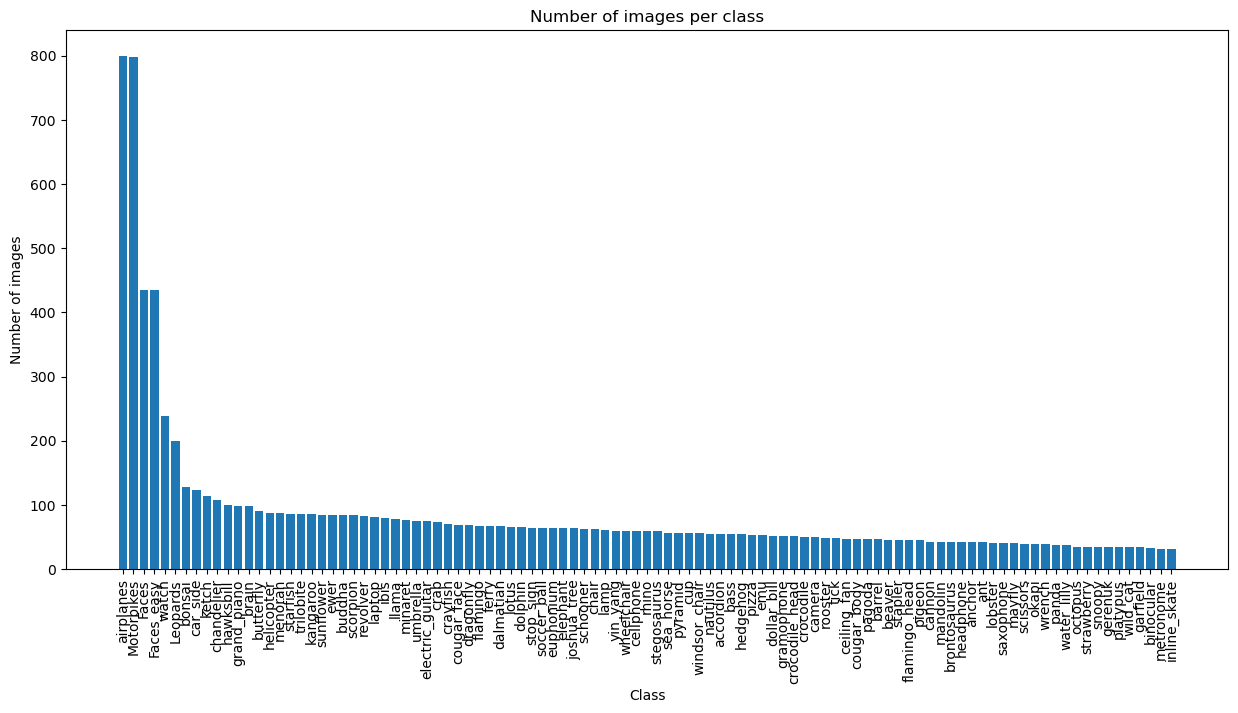

In [3]:
num_images = [len(os.listdir(os.path.join(directory, class_name))) for class_name in class_names]
sorted_indices = np.argsort(num_images)[::-1]
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_num_images = [num_images[i] for i in sorted_indices]

print("total number of images: ", sum(sorted_num_images))

plt.figure(figsize=(15, 7))
plt.bar(np.arange(len(sorted_class_names)), sorted_num_images)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.xticks(np.arange(len(sorted_class_names)), sorted_class_names, rotation=90)
plt.show()

In [4]:
print('Mean number of images per class:', np.mean(num_images))
print('Min number of images per class:', np.min(num_images))
print('Max number of images per class:', np.max(num_images))

Mean number of images per class: 85.91089108910892
Min number of images per class: 31
Max number of images per class: 800


In [15]:
import os
from PIL import Image
import imagehash

hashes = {}
duplicates = []
similarity_percentage = 1  # Adjust this value to set the similarity threshold as a percentage

# Calculate the maximum possible hash difference for a 64-bit hash
max_hash_difference = 64  # For an 8x8 hash, which is 64 bits

# Convert the percentage to an absolute threshold value
similarity_threshold = (similarity_percentage / 100) * max_hash_difference

for class_name in class_names:
    class_dir = os.path.join(directory, class_name)
    for filename in os.listdir(class_dir):
        if filename == '.DS_Store':
            continue
        image_path = os.path.join(class_dir, filename)
        image = Image.open(image_path)
        image_hash = imagehash.phash(image)
        found_duplicate = False
        for existing_hash, existing_filename in hashes.items():
            if image_hash - existing_hash < similarity_threshold and filename != existing_filename:
                duplicates.append((class_name, existing_filename, filename, image_hash - existing_hash))
                found_duplicate = True
                break
        if not found_duplicate:
            hashes[image_hash] = filename

print('Number of duplicate or similar images:', len(duplicates))
print('Examples of duplicates or similar images:', duplicates)

Number of duplicate or similar images: 35
Examples of duplicates or similar images: [('Motorbikes', 'image_0192.jpg', 'image_0195.jpg', 0), ('Motorbikes', 'image_0006.jpg', 'image_0038.jpg', 0), ('Motorbikes', 'image_0428.jpg', 'image_0429.jpg', 0), ('anchor', 'image_0005.jpg', 'image_0016.jpg', 0), ('brain', 'image_0015.jpg', 'image_0016.jpg', 0), ('buddha', 'image_0008.jpg', 'image_0083.jpg', 0), ('crayfish', 'image_0023.jpg', 'image_0001.jpg', 0), ('garfield', 'image_0032.jpg', 'image_0027.jpg', 0), ('garfield', 'image_0032.jpg', 'image_0033.jpg', 0), ('garfield', 'image_0032.jpg', 'image_0034.jpg', 0), ('gerenuk', 'image_0025.jpg', 'image_0004.jpg', 0), ('grand_piano', 'image_0006.jpg', 'image_0014.jpg', 0), ('hedgehog', 'image_0010.jpg', 'image_0001.jpg', 0), ('llama', 'image_0010.jpg', 'image_0001.jpg', 0), ('lotus', 'image_0033.jpg', 'image_0023.jpg', 0), ('lotus', 'image_0006.jpg', 'image_0015.jpg', 0), ('menorah', 'image_0053.jpg', 'image_0015.jpg', 0), ('menorah', 'image_0053

In [ ]:
# calculate the similarity between all the duplicate images
from skimage.metrics import structural_similarity as ssim
import cv2

similar_images = []
for class_name, filename1, filename2 in duplicates:
    image_path1 = os.path.join(directory, class_name, filename1)
    image_path2 = os.path.join(directory, class_name, filename2)
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    similarity = ssim(image1, image2, multichannel=True)
    similar_images.append((class_name, filename1, filename2, similarity))

ValueError: num must be an integer with 1 <= num <= 10, not 11

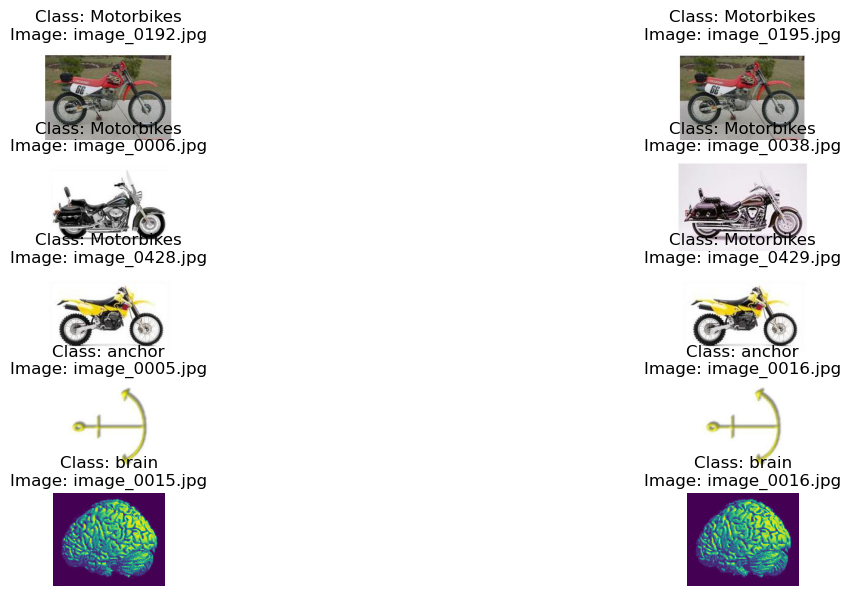

In [ ]:
# display the first 5 duplicates side by side
plt.figure(figsize=(15, 7))
for i in range(min(len(duplicates), 10)):  # Display only the first 5 duplicates
    class_name, filename1, filename2 = duplicates[i]
    image1 = Image.open(os.path.join(directory, class_name, filename1))
    image2 = Image.open(os.path.join(directory, class_name, filename2))
    
    plt.subplot(5, 2, 2 * i + 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(f'Class: {class_name}\nImage: {filename1}')
    
    plt.subplot(5, 2, 2 * i + 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(f'Class: {class_name}\nImage: {filename2}')

plt.tight_layout()
plt.show()